# Part1: Define encoders

# Import libraries

In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt

from models.activity import ActivityRecorder
from models.dendrites import Dendrite
from models.currents import ConstantCurrent, NoisyCurrent, SetCurrent, CurrentSum
from models.encoders import TimeToFirstSpikeEncoder, NumberEncoder, PoissonEncoder
from models.neurons import LIF
from models.synapses import SimpleSynapse, FullyConnectedSynapse, RandomConnectedFixedProbSynapse, \
    RandomConnectedFixedInputSynapse
from models.time_res import TimeResolution
from simulate import Simulation
from utils.images import CustomImage


# 1- Time to first spike

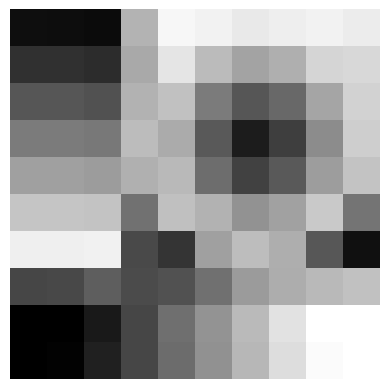

In [2]:
img1 = CustomImage('dataset/slope.tif')
img1.resize_image(10, 10)
img1.img_show()

In [3]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng1 = sim.add_neuron_group(
    tag="ng1",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=1),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: TimeToFirstSpikeEncoder(data=img1.img2tensor(),
                                   duration=50,
                                   sleep=50,
                                   theta=1,
                                   ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

sim.simulate(iterations=200)

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng1', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=1,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:TimeToFirstSpikeEncoder(data=tensor([ 14,  13,  11, 179, 247, 242, 233, 238, 242, 236,  48,  48,  45, 169,
        229, 187, 163, 175, 213, 216,  86,  86,  82, 178, 193, 123,  86, 104,
        165, 210, 123, 123, 120, 188, 171,  89,  28,  62, 140, 206, 160, 160,
        156, 176, 185, 109,  66,  89, 157, 195, 197, 197, 196, 113, 192, 178,
        146, 161, 201, 116, 239, 239, 241,  73,  53, 160, 189, 174,  87,  16,
         70,  72,  94,  75,  82, 112, 155, 173, 185, 193,   0,   0,  25,  70,
        111, 148, 186, 226, 255, 255,   0,   2,  32,  70, 108, 145, 183, 221,
        251, 255], dtype=torch.uint8),duration=50,sleep=50,theta=1,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'act

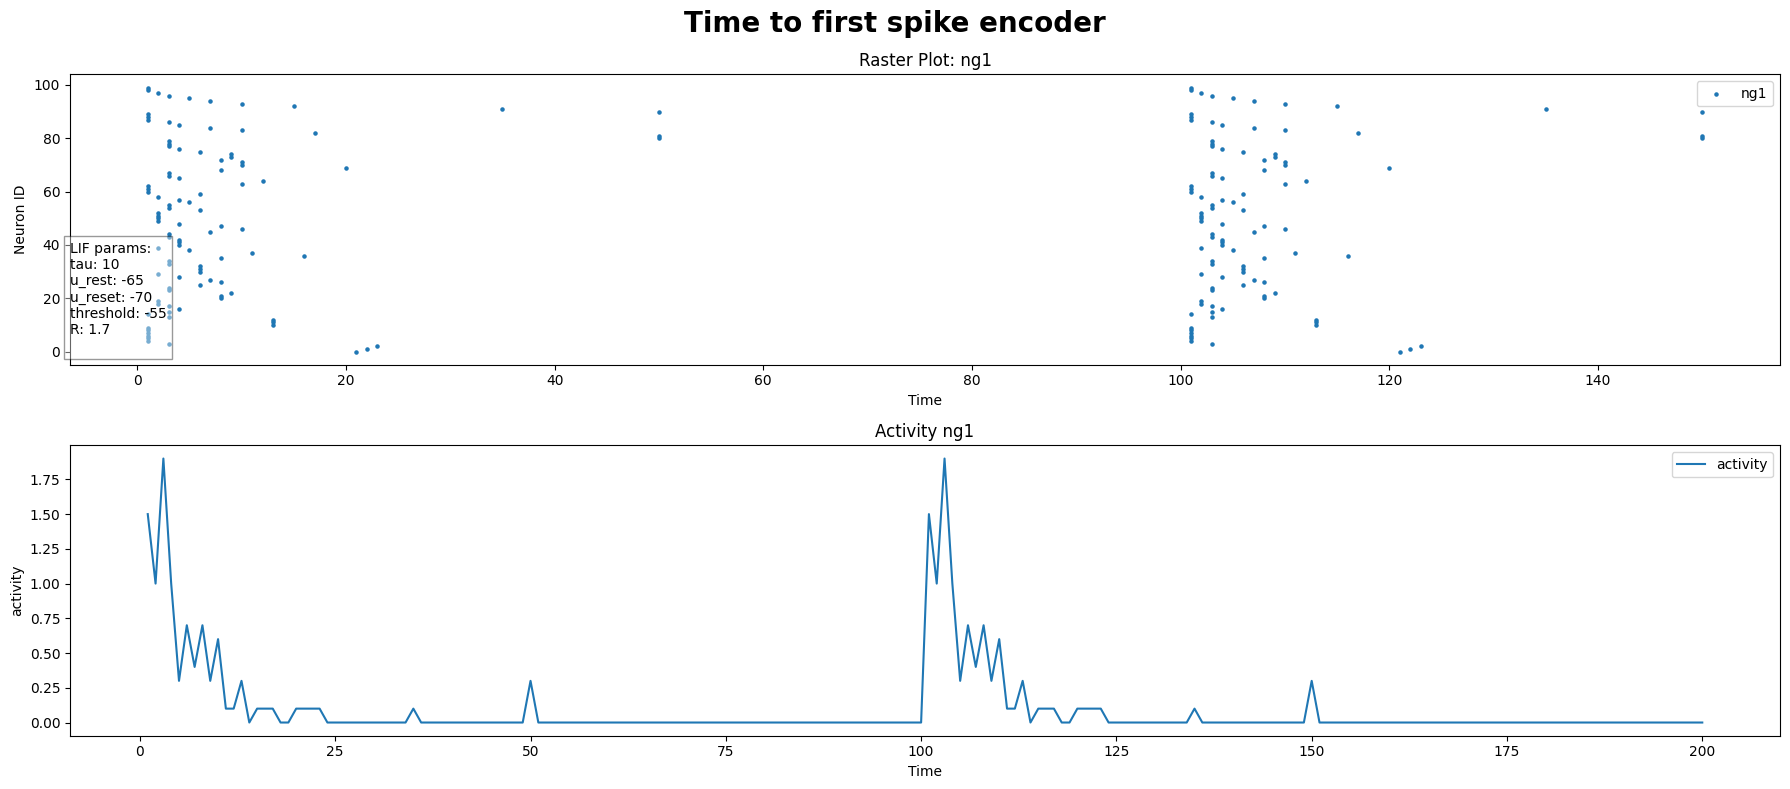

In [4]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(18, 8))



ax1 = fig.add_subplot(2, 1, 1)  # 3 rows, 1 column, first plot
ng1.add_raster_plot(ax1)
ng1.add_neuron_model_params_info(ax1, model_idx=6)

# ng1.add_current_params_info(axs[1], current_idx=2)
ax2 = fig.add_subplot(2, 1, 2)
ng1.add_activity_plot(ax2)

# ax3 = fig.add_subplot(3, 1, 3)
# ax3.axis('off')

fig.suptitle("Time to first spike encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()

# 2- Number Encoder(using normal distribution)

In [16]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng1 = sim.add_neuron_group(
    tag="ng1",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=1),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: NumberEncoder(num=4.7,
                        duration=20),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

sim.simulate(iterations=21)

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng1', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=1,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:NumberEncoder(num=4.7,duration=20,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_event,)}
21xBatch: 1/1 (100%) 64.981ms


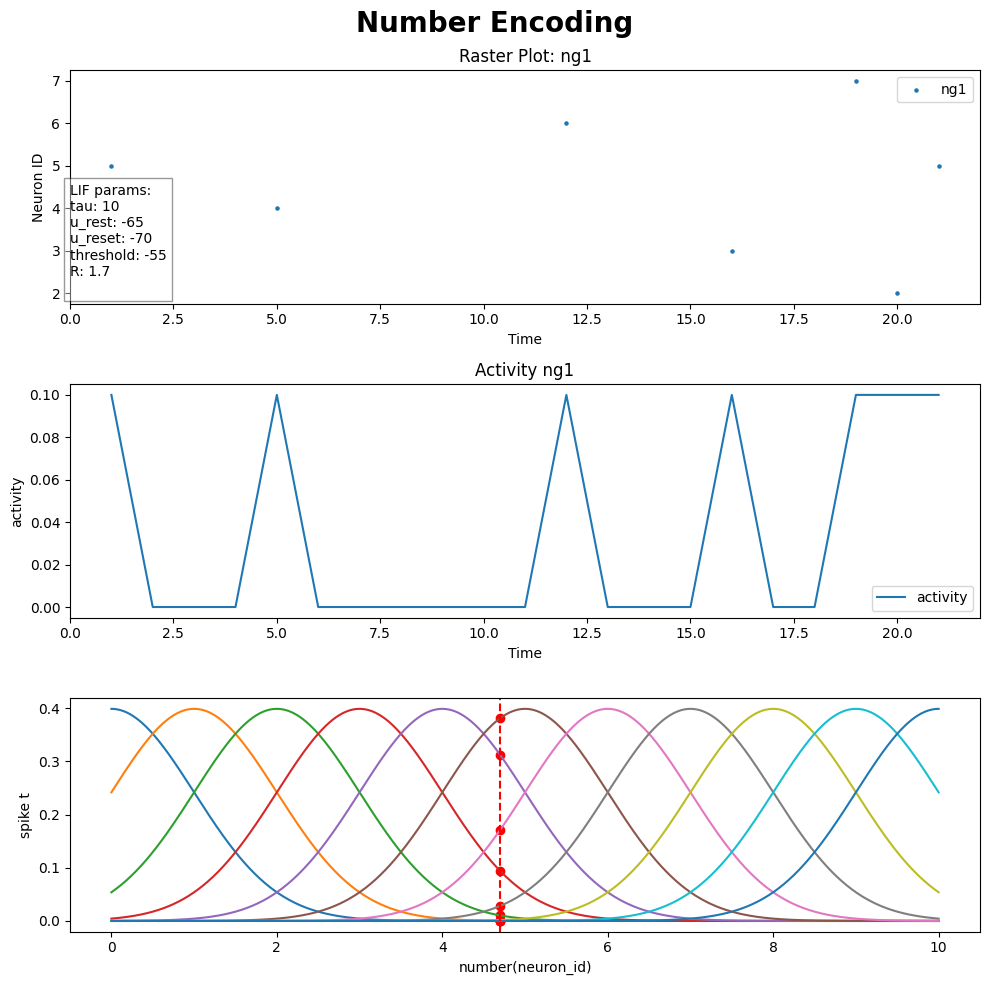

In [17]:
# fig, axs = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(10, 10))


ax1 = fig.add_subplot(3, 1, 1)  # 3 rows, 1 column, first plot
ng1.add_raster_plot(ax1)
ng1.add_neuron_model_params_info(ax1, model_idx=6)


ax2 = fig.add_subplot(3, 1, 2, sharex=ax1)  # 3 rows, 1 column, first plot
ng1.add_activity_plot(ax2)

ax3 = fig.add_subplot(3, 1, 3)  # 3 rows, 1 column, first plot
ng1.behavior[7].plot_x(ax3)
fig.suptitle("Number Encoding", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()

# 3-Poisson Encoding

In [18]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng1 = sim.add_neuron_group(
    tag="ng1",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=1),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: PoissonEncoder(data=img1.img2tensor(),
                                   duration=50,
                                   sleep=10,
                                   theta=1,
                                   ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

sim.simulate(iterations=50)

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng1', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=1,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:PoissonEncoder(data=tensor([ 14,  13,  11, 179, 247, 242, 233, 238, 242, 236,  48,  48,  45, 169,
        229, 187, 163, 175, 213, 216,  86,  86,  82, 178, 193, 123,  86, 104,
        165, 210, 123, 123, 120, 188, 171,  89,  28,  62, 140, 206, 160, 160,
        156, 176, 185, 109,  66,  89, 157, 195, 197, 197, 196, 113, 192, 178,
        146, 161, 201, 116, 239, 239, 241,  73,  53, 160, 189, 174,  87,  16,
         70,  72,  94,  75,  82, 112, 155, 173, 185, 193,   0,   0,  25,  70,
        111, 148, 186, 226, 255, 255,   0,   2,  32,  70, 108, 145, 183, 221,
        251, 255], dtype=torch.uint8),duration=50,sleep=10,theta=1,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],g

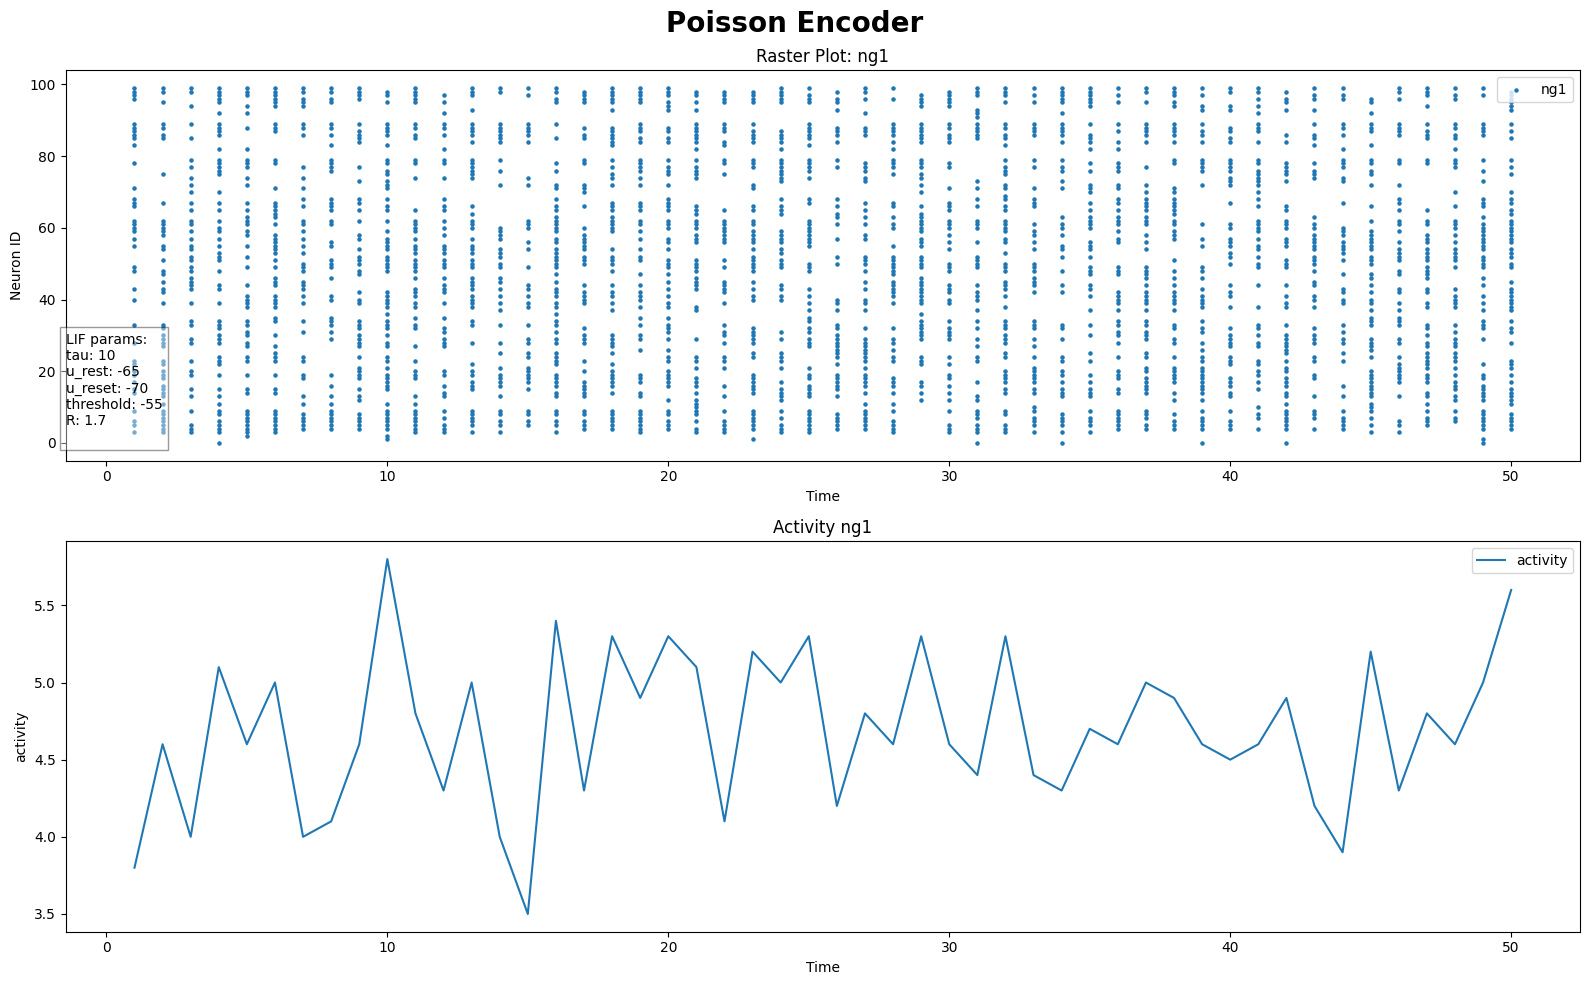

In [21]:
# fig, axs = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
fig = plt.figure(figsize=(16, 10))

# ng1.add_neuron_model_params_info(ax1, model_idx=7)

ax1 = fig.add_subplot(2, 1, 1)  # 3 rows, 1 column, first plot
ng1.add_raster_plot(ax1)
ng1.add_neuron_model_params_info(ax1, model_idx=6)

ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)  # 3 rows, 1 column, first plot
ng1.add_activity_plot(ax2)

fig.suptitle("Poisson Encoder", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()